In [21]:
# I DETTA KODBLOCK ÄR METODER SOM BEHÖVS KÖRAS "FÖRST"
# The code blocks must be run in order..
import numpy as np
from scipy.stats import truncnorm, norm
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import random

def mu_s_t(t):
  #returns the mean value of S = [s1,s2] given a value of t
  mean1 = 25
  var1 = (25/3)**2 
  mean2 = 25
  var2 = (25/3)**2 
  var_t_s = (25/6)**2  
  sigma_s_t = var_s_t()
  mean_s_t = sigma_s_t.dot(np.array([(mean1/var1 + t/var_t_s),(mean2/var2 - t/var_t_s)]))
  return mean_s_t

def var_s_t():
  mean1 = 25
  var1 = (25/3)**2 
  mean2 = 25
  var2 = (25/3)**2 
  var_t_s = (25/6)**2 

  #returns the variance of S = [s1,s2] given t
  denom = var1+var_t_s+var2 #denominator
  cov = np.array([[var1*(var_t_s+var2)/denom, var1*var2/denom],[var1*var2/denom, var2*(var1+var_t_s)/denom]])

  return cov

def mu_t_s(S):
  s1, s2 = S
  return s1-s2

def getSamples(n):
  start_time = time.time()

  s1 = np.zeros(n)
  s2 = np.zeros(n)
  #S = np.zeros(n)
  t = np.zeros(n)

# Med dessa hyperparametrar fann vi en burn-in på omkring 25
  mean1 = 25
  var1 = (25/3)**2 
  mean2 = 25
  var2 = (25/3)**2 
  var_t_s = (25/6)**2 


  for k in range(n-1):
    s1[k+1], s2[k+1] = np.random.multivariate_normal(mu_s_t(t[k]),var_s_t())
    t[k+1] = truncnorm.rvs(a=(0-mu_t_s([s1[k],s2[k]]))/np.sqrt(var_t_s),b= np.inf,loc=mu_t_s([s1[k],s2[k]]), scale= np.sqrt(var_t_s)) #a = 0, b = np.inf

  print("---Time needed to draw " + str(n) + " samples: %s seconds ---" % (time.time() - start_time))
  return s1, s2

def removeBurnIn(s1,s2):
  burn_in = [x for x in range(25)]
  s1 = np.delete(s1, burn_in)
  s2 = np.delete(s2, burn_in)
  return s1, s2



---Time needed to draw 1000 samples: 0.2738380432128906 seconds ---


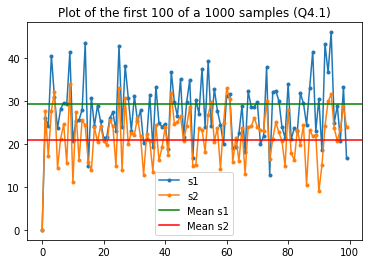

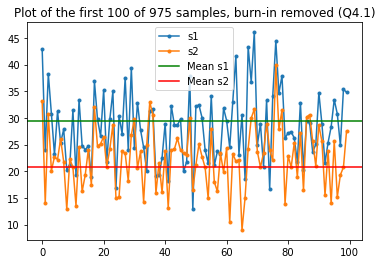

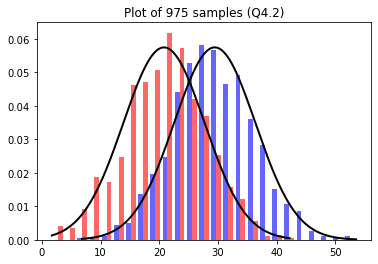

---Time needed to draw 400 samples: 0.10779404640197754 seconds ---


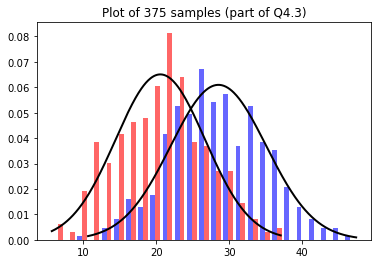

---Time needed to draw 800 samples: 0.2565770149230957 seconds ---


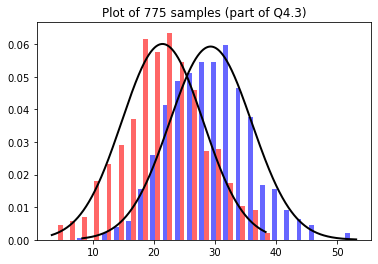

---Time needed to draw 1600 samples: 0.46728014945983887 seconds ---


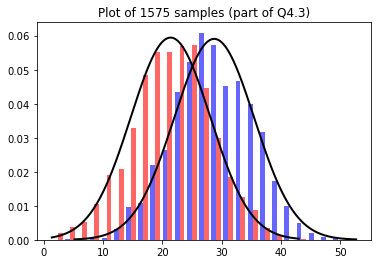

---Time needed to draw 3200 samples: 0.9228181838989258 seconds ---


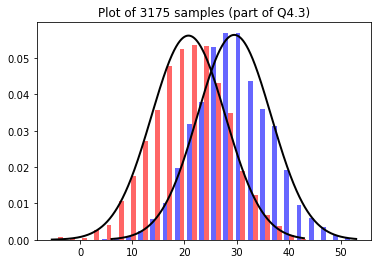

In [22]:
# Q4 MAIN
def q4Main(n):
  # Q4 del 1
  s1, s2 = getSamples(1000)
  plt.plot(s1[:100], ".-", label='s1')
  plt.plot(s2[:100], ".-", label='s2')
  plt.title('Plot of the first 100 of a 1000 samples (Q4.1)')
  plt.axhline(y=np.mean(s1), color='g', label='Mean s1')
  plt.axhline(y=np.mean(s2), color='r', label='Mean s2')
  plt.legend()
  plt.show()

  s1, s2 = removeBurnIn(s1,s2)
  plt.plot(s1[:100], ".-", label='s1')
  plt.plot(s2[:100], ".-", label='s2')
  plt.title('Plot of the first 100 of ' + str(len(s1)) + ' samples, burn-in removed (Q4.1)')
  plt.axhline(y=np.mean(s1), color='g', label='Mean s1')
  plt.axhline(y=np.mean(s2), color='r', label='Mean s2')
  plt.legend()
  plt.show()
  
  # Q4 del 2
  s1, s2 = removeBurnIn(s1,s2)
  mu1, std1 = norm.fit(s1)
  mu2, std2 = norm.fit(s2)
  plt.hist([s1,s2], bins=25, density=True, alpha=0.6, color=['b', 'r'])
  s1min = min(s1)
  s1max = max(s1)
  s2min = min(s2)
  s2max = max(s2)
  s1x = np.linspace(s1min, s1max, n)
  s2x = np.linspace(s2min, s2max, n)
  p1 = norm.pdf(s1x, mu1, std1)
  p2 = norm.pdf(s2x, mu2, std2)
  plt.plot(s1x, p1, 'k', linewidth=2)
  plt.plot(s2x, p2, 'k', linewidth=2)
  plt.title("Plot of " + str(n-25) + " samples (Q4.2)")
  plt.show()

  # Q4 del 3
  samples = [400, 800, 1600, 3200]
  for i in samples:
    s1, s2 = getSamples(i)
    s1, s2 = removeBurnIn(s1,s2)
    mu1, std1 = norm.fit(s1)
    mu2, std2 = norm.fit(s2)
    plt.hist([s1,s2], bins=25, density=True, alpha=0.6, color=['b', 'r'])
    s1min = min(s1)
    s1max = max(s1)
    s2min = min(s2)
    s2max = max(s2)
    s1x = np.linspace(s1min, s1max, i)
    s2x = np.linspace(s2min, s2max, i)
    p1 = norm.pdf(s1x, mu1, std1)
    p2 = norm.pdf(s2x, mu2, std2)
    plt.plot(s1x, p1, 'k', linewidth=2)
    plt.plot(s2x, p2, 'k', linewidth=2)
    plt.title("Plot of " + str(i-25) + " samples (part of Q4.3)")
    plt.show()


q4Main(1000)

---Time needed to draw 1025 samples: 0.29426097869873047 seconds ---


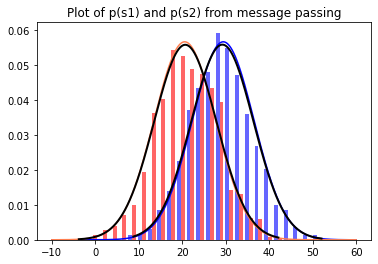

In [23]:
# Q8 utifrån ex 7.1

def messagePassingMethod(m0_s1, s0_s1, m0_s2, s0_s2, t):

  def multGauss(m1, s1, m2, s2):
    # computes N(m,s) being prop to N(m1,s1)*N(m2,s2)
    s = 1/(1/s1+1/s2)
    m = (m1/s1+m2/s2)*s
    return m, s

  def divGauss(m1, s1, m2, s2):
    # computes N(m,s) being prop to N(m1,s1)/N(m2,s2)
    m, s = multGauss(m1, s1, m2, -s2)
    return m, s

  def truncGauss(a, b, m0, s0):
    # computes the mean and variance of a trunc Gauss distr
    # [a,b] truncation interval
    a_scaled, b_scaled = (a-m0) / np.sqrt(s0), (b-m0) / np.sqrt(s0)
    m = truncnorm.mean(a_scaled, b_scaled, loc=m0, scale=np.sqrt(s0))
    s = truncnorm.var(a_scaled, b_scaled, loc=m0, scale=np.sqrt(s0))
    return m, s

  sv = (25/6)**2    # The variance of p(t|s1,s2)

  # The measurement of y 
  if t > 0:
    y0 = 1
  else:
    y0 = -1 

  # Message mu3 from p(s1) to node s_1
  mu3_m = m0_s1 # mean of msg
  mu3_s = s0_s1 # var of msg

  # Message mu4 from p(s2) to node s_2
  mu4_m = m0_s2 # mean of msg
  mu4_s = s0_s2 # var of msg

  # Message mu5 from node s1 to factor fc
  mu5_m = mu3_m
  mu5_s = mu3_s

  # Message mu6 from node s2 to factor fc
  mu6_m = mu4_m
  mu6_s = mu4_s

  # Message mu7 from factor fc to node t
  mu7_m = mu5_m - mu6_m
  mu7_s = mu5_s + mu6_s + sv

  # Do moment matching of the marginal of t
  if y0 == 1:
    a_s1, b_s1 = -1000, 0
    a_s2, b_s2 = 0, 1000
  else:
    a_s1, b_s1 = 0, 1000
    a_s2, b_s2 = -1000, 0

  pt_s1_m, pt_s1_s = truncGauss(a_s1, b_s1, mu7_m, mu7_s)
  pt_s2_m, pt_s2_s = truncGauss(a_s2, b_s2, mu7_m, mu7_s)

  # Compute the msg from t to fc
  mu8_s1_m, mu8_s1_s = divGauss(pt_s1_m, pt_s1_s, mu7_m, mu7_s)
  mu8_s2_m, mu8_s2_s = divGauss(pt_s2_m, pt_s2_s, mu7_m, mu7_s)

  # Compute the msg from fc to s1 and s2
  mu9_m = mu6_m - mu8_s1_m
  mu9_s = mu6_s + mu8_s1_s + sv
  mu10_m = mu5_m - mu8_s2_m
  mu10_s = mu5_s + mu8_s2_s + sv

  # Compute the marginal of S - post distr of skills
  ps1_m, ps1_s = multGauss(mu3_m, mu3_s, mu9_m, mu9_s)
  ps2_m, ps2_s = multGauss(mu4_m, mu4_s, mu10_m, mu10_s)

  return ps1_m, ps1_s, ps2_m, ps2_s

def getHistDist(n):
  # n is amount of samples 
  s1, s2 = getSamples(n)
  s1, s2 = removeBurnIn(s1,s2)

  # Fit a normal distribution to the s1 data:
  mu1, std1 = norm.fit(s1)
  # Fit a normal distribution to the s2 data:
  mu2, std2 = norm.fit(s2)
  
  # Plot the histogram for s1.
  plt.hist([s1,s2], bins=25, density=True, alpha=0.6, color=['b', 'r'])
  
  # Get min and max for s1 and s2
  s1min = min(s1)
  s1max = max(s1)

  s2min = min(s2)
  s2max = max(s2)

  # Set the space for s1 and s2 ??
  s1x = np.linspace(s1min, s1max, n)
  s2x = np.linspace(s2min, s2max, n)

  # Get the prob. dens. func. for s1 and s2
  p1 = norm.pdf(s1x, mu1, std1)
  p2 = norm.pdf(s2x, mu2, std2)

  return s1x, s2x, p1, p2

m0_s1 = 25        # The mean of the prior p(s1)
s0_s1 = (25/3)**2 # The variance of the prior p(s1)
m0_s2 = 25        # The mean of the prior p(s2)
s0_s2 = (25/3)**2 # The variance of the prior p(s2)
sv = (25/6)**2    # The variance of p(t|s1,s2)
t = 1             # The measurement of t (a positive value)

def Q8():
  ps1_m, ps1_s, ps2_m, ps2_s = messagePassingMethod(m0_s1, s0_s1, m0_s2, s0_s2, t)
  s1x, s2x, p1, p2 = getHistDist(1025)

  x = np.linspace(-10, 60, 3000)

  ps1 = norm.pdf(x, ps1_m, np.sqrt(ps1_s))
  ps2 = norm.pdf(x, ps2_m, np.sqrt(ps2_s))
  
  plt.plot(x, ps1, color='blue')
  plt.plot(x, ps2, color='coral')
  plt.plot(s1x, p1, 'k', linewidth=2)
  plt.plot(s2x, p2, 'k', linewidth=2)
  plt.title("Plot of p(s1) and p(s2) from message passing")

Q8()

In [24]:
#Q5
def new_var(samples, mean):
  sum = 0
  for i in range(len(samples)):
    sum = sum + (samples[i]-mean)**2
  var = sum / len(samples)
  return var

def mu_s_t_q5(s1,s2,var_s1,var_s2,t):
  #returns the mean value of S = [s1,s2] given a value of t
  mean1 = s1
  var1 = var_s1
  mean2 = s2
  var2 = var_s2
  var_t_s = (25/12)**2  
  sigma_s_t = var_s_t(s1,s2,var1,var2)
  mean_s_t = sigma_s_t.dot(np.array([(mean1/var1 + t/var_t_s),(mean2/var2 - t/var_t_s)]))
  return mean_s_t

def var_s_t(s1,s2,var_s1,var_s2):
  mean1 = s1
  var1 = var_s1
  mean2 = s2
  var2 = var_s2
  var_t_s = (25/12)**2 

  #returns the variance of S = [s1,s2] given t
  denom = var1+var_t_s+var2 #denominator
  cov = np.array([[var1*(var_t_s+var2)/denom, var1*var2/denom],[var1*var2/denom, var2*(var1+var_t_s)/denom]])

  return cov

def mu_t_s(s1,s2):
  return (s1-s2 + 1/100)

def which_team_won(s1,s2):
    var_t_s = (25/6)**2 
    mu_t_s = s1-s2
    cumulative_val = (s1-s2)/var_t_s
    if (norm.cdf(cumulative_val) > 0.5):
      return(1)
    else:
      return(-1)

def gibbs_sampler(s_team1,s_team2,var_team1,var_team2,t_input):
    
    if (t_input > 0):
        y = 1
    else: 
        y = -1
    N = 1025
    s1 = np.zeros(N)
    s2 = np.zeros(N)
    t = np.zeros(N)
    n = N
    s1[0] = s_team1
    s2[0] = s_team2
    t[0] = t_input 

# Med dessa hyperparametrar fann vi en burn-in på omkring 20
    mean1 = s_team1
    var1 = var_team1
    mean2 = s_team2
    var2 = var_team2
    var_t_s = (25/12)**2 
    fixed_var_s_t = var_s_t(mean1,mean2,var1,var2)


    for k in range(n-1):
        #s1[k+1], s2[k+1] = np.random.multivariate_normal(mu_s_t(s1[k],s2[k],var1,var2,t[k]),var_s_t(s1[k],s2[k],var1,var2))
        s1[k+1], s2[k+1] = np.random.multivariate_normal(mu_s_t_q5(mean1,mean2,var1,var2,t[k]),fixed_var_s_t)
        if (mu_t_s(s1[k],s2[k]) > 0 and (y == 1)):
            t[k+1] = truncnorm.rvs(a=(0-mu_t_s(s1[k],s2[k]))/np.sqrt(var_t_s),b= np.inf,loc=mu_t_s(s1[k],s2[k]), scale= np.sqrt(var_t_s)) #a = 0, b = np.inf
        
        elif (mu_t_s(s1[k],s2[k]) < 0 and (y == -1)):
             t[k+1] = truncnorm.rvs(a=-np.inf,b=(0-mu_t_s(s1[k],s2[k]))/np.sqrt(var_t_s),loc=mu_t_s(s1[k],s2[k]), scale= np.sqrt(var_t_s))
        else:
            t[k+1] = 0
# Sätter burn-in till 20 och tar bort de samplesen
    burn_in = [x for x in range(26)]
    s1 = np.delete(s1, burn_in)
    s2 = np.delete(s2, burn_in)
    #print(s1[0:25])
    #print(s1[N-50:N-25])
    return (s1, s2)

#load the data and store in param "games"
url = "http://www.it.uu.se/edu/course/homepage/apml/project/SerieA.csv"
games = pd.read_csv(url, na_values='?');
teams_array = games['team1'].unique()
teams_array2 = games['team2'].unique()

games_scrambled = games.sample(frac=1)
#print(games[0:4])

#create data frame with teams as columns
initial_skills = [25] *(len(teams_array))
initial_var = [(25/3)**2]*(len(teams_array))

teams_df = pd.DataFrame(np.array([initial_skills,initial_var]), columns =teams_array)


#remove all draws
games = games.drop(games[(games.score1 == games.score2)].index)
games_scrambled = games_scrambled.drop(games[(games.score1 == games.score2)].index)
train, test = train_test_split(games, test_size=0.33)

def main_function(game_df):
  games = game_df
  #reset teams array for random implementation
  initial_skills = [25] *(len(teams_array))
  initial_var = [(25/3)**2]*(len(teams_array))
  teams_df = pd.DataFrame(np.array([initial_skills,initial_var]), columns =teams_array)
  for index, row in games.iterrows():
    #print("on index", index)
    team1 = row['team1']
    team2 = row['team2']
    s_team1 = teams_df[team1].values[0]
    s_team2 = teams_df[team2].values[0]
    var_team1 = teams_df[team1].values[1]
    var_team2 = teams_df[team2].values[1]
  
    initial_t = row['score1']-row['score2']
    #print("initial t is:", initial_t)
    s1_vect,s2_vect = gibbs_sampler(s_team1,s_team2,var_team1,var_team2,initial_t) 
    
    new_s_team1 = np.mean(s1_vect)
    #print("new_team1_s:",new_s_team1)
    new_s_team2 = np.mean(s2_vect)
    #print("new_team2_s:",new_s_team2)
    
    new_var_team1 = new_var(s1_vect, new_s_team1)
    new_var_team2 = new_var(s2_vect, new_s_team2)
    #print("new_var_team1 :", new_var_team1)
    #print("new_var_team2 :", new_var_team2)


    #fixa positionen

    teams_df.loc[0,team1] = new_s_team1
    teams_df.loc[0,team2] = new_s_team2
    teams_df.loc[1,team1] = new_var_team1
    teams_df.loc[1,team2] = new_var_team2



  pd.set_option("display.max_rows", None, "display.max_columns", None)
  print(teams_df)
  return(teams_df)


main_function(games)
main_function(games_scrambled)

      Chievo      Lazio     Torino   Sassuolo      Parma     Empoli  \
0  21.369856  25.297529  26.765868  23.618534  23.918004  24.415067   
1   2.033008   0.630340   0.770723   0.926666   0.618359   0.679155   

     Bologna   Atalanta   Juventus     Napoli       Spal    Udinese  \
0  24.638035  27.069498  26.945935  27.476019  24.552782  24.098041   
1   0.675514   0.688000   0.938006   0.993949   0.694018   0.737112   

       Inter      Genoa  Frosinone  Fiorentina   Cagliari       Roma  \
0  26.741257  24.197980  22.106564    23.94680  23.880200  25.860444   
1   0.827715   0.928539   0.819497     0.87728   0.699103   0.586869   

       Milan  Sampdoria  
0  27.445765  24.755742  
1   1.064972   0.505475  
      Chievo      Lazio     Torino   Sassuolo      Parma     Empoli  \
0  22.653890  24.549395  27.371491  23.851054  23.913947  23.798643   
1   0.323039   0.266601   0.365031   0.366926   0.309249   0.322290   

     Bologna   Atalanta   Juventus     Napoli       Spal    Udi

,Chievo,Lazio,Torino,Sassuolo,Parma,Empoli,Bologna,Atalanta,Juventus,Napoli,Spal,Udinese,Inter,Genoa,Frosinone,Fiorentina,Cagliari,Roma,Milan,Sampdoria
0,22.653890,24.549395,27.371491,23.851054,23.913947,23.798643,24.978207,25.502609,26.623561,26.076796,23.253129,23.589353,25.783084,23.608697,22.301037,24.425862,23.917439,25.633214,26.170394,24.980404
1,0.323039,0.266601,0.365031,0.366926,0.309249,0.322290,0.424294,0.247047,0.319840,0.435254,0.346743,0.427770,0.364511,0.234510,0.371290,0.318863,0.295212,0.350059,0.475179,0.307216


In [25]:
#q6,q9,q10

url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv"
matches = pd.read_csv(url, na_values='?');
tourn_arr = ['Australian Open','Wimbledon','US Open','Roland Garros']
#matches contains 500+ matches from Grand Slams
matches = matches.loc[matches['tourney_name'].isin(tourn_arr)]
matches = matches.reset_index(drop=True)

players_arr = matches['winner_name'].unique()
players_arr2 = matches['loser_name'].unique()
list1 = players_arr.tolist()
list2 = players_arr2.tolist()
list3 = list1+list2

players_arr = np.unique(list3)
initial_skills_t = [25] *(len(players_arr))
initial_var_t = [(25/3)**2]*(len(players_arr))
players_df_t = pd.DataFrame(np.array([initial_skills_t,initial_var_t]), columns =players_arr)

train_t, test_t = train_test_split(matches, test_size=0.33)
#------------------------------------------------------------------
url1 = "http://www.it.uu.se/edu/course/homepage/apml/project/SerieA.csv"
games = pd.read_csv(url1, na_values='?');
teams_array = games['team1'].unique()
teams_array2 = games['team2'].unique()

#create data frame with teams as columns
initial_skills_f = [25] *(len(teams_array))
initial_var_f = [(25/3)**2]*(len(teams_array))
teams_df = pd.DataFrame(np.array([initial_skills_f,initial_var_f]), columns =teams_array)

#remove all draws
games = games.drop(games[(games.score1 == games.score2)].index)
train_f, test_f = train_test_split(games, test_size=0.33)

def main_function_q9(train,what_model,sport):
    if (sport == "tennis"):
        for index, row in train.iterrows():
            player1 = row['winner_name']
            player2 = row['loser_name']
            initial_t = 2
            s_team1 = players_df_t[player1].values[0]
            s_team2 = players_df_t[player2].values[0]
            var_team1 = players_df_t[player1].values[1]
            var_team2 = players_df_t[player2].values[1]
            if(what_model == "gibbs"):
                s1_vect,s2_vect = gibbs_sampler(s_team1,s_team2,var_team1,var_team2,initial_t) 
                new_s_team1 = np.mean(s1_vect)
                new_s_team2 = np.mean(s2_vect)
                new_var_team1 = new_var(s1_vect, new_s_team1)
                new_var_team2 = new_var(s2_vect, new_s_team2)
            if(what_model == "message_pass"):
                new_s_team1,new_var_team1,new_s_team2,new_var_team2 = messagePassingMethod(s_team1, var_team1,s_team2, var_team2,initial_t)
              
            players_df_t.loc[0,player1] = new_s_team1 #changes made
            players_df_t.loc[0,player2] = new_s_team2
            players_df_t.loc[1,player1] = new_var_team1
            players_df_t.loc[1,player2] = new_var_team2
        return(players_df_t)
    
    if(sport == "football"):
        for index, row in train.iterrows():
            team1 = row['team1']
            team2 = row['team2']
            s_team1 = teams_df[team1].values[0]
            s_team2 = teams_df[team2].values[0]
            var_team1 = teams_df[team1].values[1]
            var_team2 = teams_df[team2].values[1]
            initial_t = row['score1']-row['score2']
            if(what_model == "gibbs"):
                s1_vect,s2_vect = gibbs_sampler(s_team1,s_team2,var_team1,var_team2,initial_t) 
                new_s_team1 = np.mean(s1_vect)
                new_s_team2 = np.mean(s2_vect)
                new_var_team1 = new_var(s1_vect, new_s_team1)
                new_var_team2 = new_var(s2_vect, new_s_team2)
            if(what_model == "message_pass"):
                new_s_team1,new_var_team1,new_s_team2,new_var_team2 = messagePassingMethod(s_team1, var_team1,s_team2, var_team2,initial_t)
    
            teams_df.loc[0,team1] = new_s_team1
            teams_df.loc[0,team2] = new_s_team2
            teams_df.loc[1,team1] = new_var_team1
            teams_df.loc[1,team2] = new_var_team2
        return(teams_df)
    #swap between Gibbs and Message passing here

def prediction_function(model,test,what_model,extension,sport):
    pred_arr = []
    real_winner_arr = []
    correct_predictions = 0
    random_cor_pred = 0
    random_arr = [] 
    
    if (sport == "tennis"):
        for index, row in test.iterrows():
            player1 = row['winner_name'] #namn
            player2 = row['loser_name']
            s_team1 = model[player1].values[0]
            s_team2 = model[player2].values[0]
            var_team1 = model[player1].values[1]
            var_team2 = model[player2].values[1]
            initial_t = 2
            real_winner = 1
            var_t_s = (25/6)**2
            cumul_val = (s_team1-s_team2) / math.sqrt(var_t_s)

            #do prediction
            prediction = which_team_won(s_team1,s_team2)
            real_winner_arr.append(real_winner)
            pred_arr.append(prediction)
            random_arr.append(np.sign(random.uniform(-0.5,0.5)))
            if (what_model == "gibbs"):
                initial_t = 2
                s1_vect,s2_vect = gibbs_sampler(s_team1,s_team2,var_team1,var_team2,initial_t)    
                new_s_team1 = np.mean(s1_vect)
                new_s_team2 = np.mean(s2_vect)
                new_var_team1 = new_var(s1_vect, new_s_team1)
                new_var_team2 = new_var(s2_vect, new_s_team2)
            if (what_model == "message_pass"):
                new_s_team1,new_var_team1,new_s_team2,new_var_team2 = messagePassingMethod(s_team1, var_team1,s_team2, var_team2,initial_t)
            if(extension == "extension"):
                score_str = row['score']
                score_winner = 0
                score_loser = 0
                for element in range(0, len(score_str)):
                    if (score_str[element] == "-"):
                        score_winner += int(score_str[element-1])
                        score_loser += int(score_str[element+1])
                if (score_winner != 0):
                    score_diff_rate = score_winner/ (score_winner +score_loser)
                else:
                    score_diff_rate = 0

                if(score_diff_rate > 0.62):
                    new_s_team1 = 1.4* new_s_team1
            
            model.loc[0,player1] = new_s_team1
            model.loc[0,player2] = new_s_team2
            model.loc[1,player1] = new_var_team1
            model.loc[1,player2] = new_var_team2
    
    
    
    #--------------------------------------------
            
    if(sport == "football"):
        for index, row in test.iterrows():
            team1 = row['team1']
            team2 = row['team2']
            s_team1 = teams_df[team1].values[0]
            s_team2 = teams_df[team2].values[0]
            var_team1 = teams_df[team1].values[1]
            var_team2 = teams_df[team2].values[1]
            initial_t = row['score1']-row['score2']
            real_winner = np.sign(row['score1'] - row['score2'])
            var_t_s = (25/6)**2
            cumul_val = (s_team1-s_team2) / math.sqrt(var_t_s)
            #do prediction
            prediction = which_team_won(s_team1,s_team2)
            real_winner_arr.append(real_winner)
            pred_arr.append(prediction)
            random_arr.append(np.sign(random.uniform(-0.5,0.5)))
            if (what_model == "gibbs"):
                s1_vect,s2_vect = gibbs_sampler(s_team1,s_team2,var_team1,var_team2,initial_t)    
                new_s_team1 = np.mean(s1_vect)
                new_s_team2 = np.mean(s2_vect)
                new_var_team1 = new_var(s1_vect, new_s_team1)
                new_var_team2 = new_var(s2_vect, new_s_team2)
            if (what_model == "message_pass"):
                new_s_team1,new_var_team1,new_s_team2,new_var_team2 = messagePassingMethod(s_team1, var_team1,s_team2, var_team2,initial_t)
            if (extension == "extension"):
                if (initial_t > 3):
                    new_s_team1 = 1.4* new_s_team1
                    new_s_team2 = 0.9*new_s_team2
                elif (initial_t < -3):
                    new_s_team1 = 0.9* new_s_team1
                    new_s_team2 = 1.3 *new_s_team2
                    
            teams_df.loc[0,team1] = new_s_team1
            teams_df.loc[0,team2] = new_s_team2
            teams_df.loc[1,team1] = new_var_team1
            teams_df.loc[1,team2] = new_var_team2
            
    
    #swap between gibbs sampler and Message passing
   
    #----------------------------------------------------------     

    for i in range(len(pred_arr)):
        if random_arr[i] == real_winner_arr[i]:
            random_cor_pred +=1
        if pred_arr[i] == real_winner_arr[i]:
            correct_predictions +=1

    return(correct_predictions/(len(pred_arr)), random_cor_pred/(len(pred_arr)))


In [26]:
def print_function():
    model = main_function_q9(train_f,"gibbs","football")
    pred_pred, random_pred = prediction_function(model,test_f,"gibbs","","football")
    print("case: football, gibbs, extension off")
    print("pred_rate: ", pred_pred , "random_rate: ", random_pred)
    print("----------------------------------------------------")
    teams_df = pd.DataFrame(np.array([initial_skills_f,initial_var_f]), columns =teams_array)
    model = main_function_q9(train_f,"message_pass","football")
    pred_pred, random_pred = prediction_function(model,test_f,"message_pass","","football")
    print("case: football, message passing, extension off")
    print("pred_rate: ", pred_pred , "random_rate: ", random_pred)
    print("----------------------------------------------------")
    teams_df = pd.DataFrame(np.array([initial_skills_f,initial_var_f]), columns =teams_array)
    model = main_function_q9(train_f,"message_pass","football")
    pred_pred, random_pred = prediction_function(model,test_f,"message_pass","extension","football")
    print("case: football, message passing, extension ON")
    print("pred_rate: ", pred_pred , "random_rate: ", random_pred)
    print("----------------------------------------------------")
    teams_df = pd.DataFrame(np.array([initial_skills_f,initial_var_f]), columns =teams_array)
    model = main_function_q9(train_f,"gibbs","football")
    pred_pred, random_pred = prediction_function(model,test_f,"gibbs","extension","football")
    print("case: football, gibbs, extension ON")
    print("pred_rate: ", pred_pred , "random_rate: ", random_pred)
    print("----------------------------------------------------")
    players_df = pd.DataFrame(np.array([initial_skills_t,initial_var_t]), columns =players_arr)
    model = main_function_q9(train_t,"gibbs","tennis")
    pred_pred, random_pred = prediction_function(model,test_t,"gibbs","","tennis")
    print("case: tennis, gibbs, extension off")
    print("pred_rate: ", pred_pred , "random_rate: ", random_pred)
    print("----------------------------------------------------")
    players_df = pd.DataFrame(np.array([initial_skills_t,initial_var_t]), columns =players_arr)
    model = main_function_q9(train_t,"message_pass","tennis")
    pred_pred, random_pred = prediction_function(model,test_t,"message_pass","","tennis")
    print("case: tennis, message passing, extension off")
    print("pred_rate: ", pred_pred , "random_rate: ", random_pred)
    print("----------------------------------------------------")
    players_df = pd.DataFrame(np.array([initial_skills_t,initial_var_t]), columns =players_arr)
    model = main_function_q9(train_t,"message_pass","tennis")
    pred_pred, random_pred = prediction_function(model,test_t,"message_pass","extension","tennis")
    print("case: tennis, message passing, extension ON")
    print("pred_rate: ", pred_pred , "random_rate: ", random_pred)
    print("----------------------------------------------------")
    players_df = pd.DataFrame(np.array([initial_skills_t,initial_var_t]), columns =players_arr)
    model = main_function_q9(train_t,"gibbs","tennis")
    pred_pred, random_pred = prediction_function(model,test_t,"gibbs","extension","tennis")
    print("case: tennis, gibbs, extension ON")
    print("pred_rate: ", pred_pred , "random_rate: ", random_pred)
    print("----------------------------------------------------")

print_function()

case: football, gibbs, extension off
pred_rate:  0.7 random_rate:  0.5222222222222223
----------------------------------------------------
case: football, message passing, extension off
pred_rate:  0.7111111111111111 random_rate:  0.4888888888888889
----------------------------------------------------
case: football, message passing, extension ON
pred_rate:  0.7 random_rate:  0.5555555555555556
----------------------------------------------------
case: football, gibbs, extension ON
pred_rate:  0.6111111111111112 random_rate:  0.5333333333333333
----------------------------------------------------
case: tennis, gibbs, extension off
pred_rate:  0.5952380952380952 random_rate:  0.5297619047619048
----------------------------------------------------
case: tennis, message passing, extension off
pred_rate:  0.7619047619047619 random_rate:  0.48214285714285715
----------------------------------------------------


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


case: tennis, message passing, extension ON
pred_rate:  0.7023809523809523 random_rate:  0.49404761904761907
----------------------------------------------------


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: covariance is not positive-semidefinite.


case: tennis, gibbs, extension ON
pred_rate:  0.005952380952380952 random_rate:  0.5
----------------------------------------------------
